# Introduction to ARIMA Models

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> We're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

- To effectively use ARIMA we need to understand Stationarity in our data.
- A stationary series has constant mean and variance over time.
- A stationary data set will allow our model to predict the mean and variance.
- To test stationary --> Augmented Dickey-Fuller test
- If data is not stationary, you will need to transform it to be stationary in order to evaluate it and what type of ARIMA terms you will use. --> 'differencing'

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa import ar_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


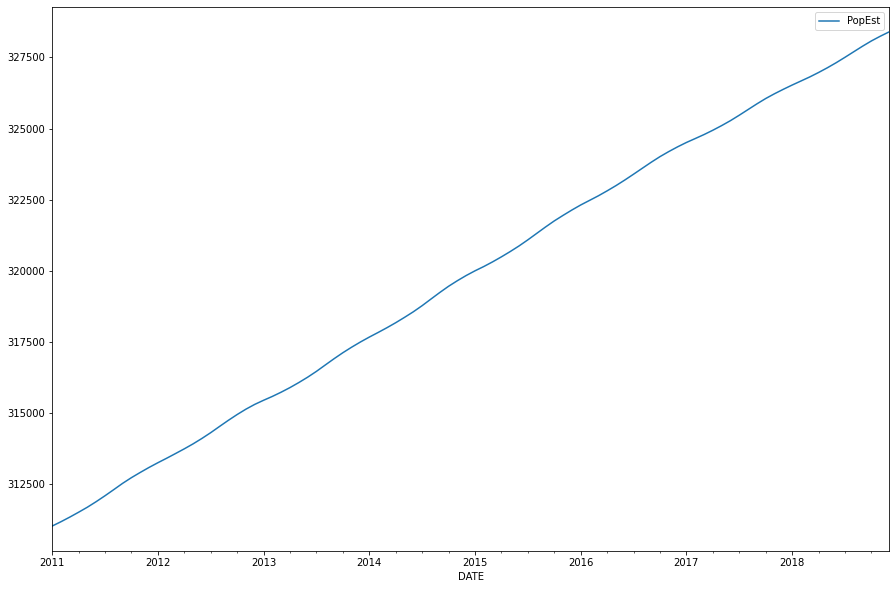

In [5]:
df.plot(figsize=(15,10));

In [8]:
len(df)

# 96 months: 12 months test set + 84 train set

96

In [9]:
train = df.iloc[:84]

In [10]:
test = df.iloc[84:]

## Fit an AR(1) Model

In [20]:
model = ar_model.AutoReg(train['PopEst'], lags=1)

In [21]:
AR1fit = model.fit()

In [22]:
AR1fit.aic

767.6378091856507

In [23]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [25]:
start = len(train)
end = len(train) + len(test) - 1

In [26]:
start, end

(84, 95)

In [27]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [28]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [29]:
pred1 = AR1fit.predict(start=start, end=end)

In [30]:
pred1 = pred1.rename('AR(1) Predictions')

In [31]:
pred1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

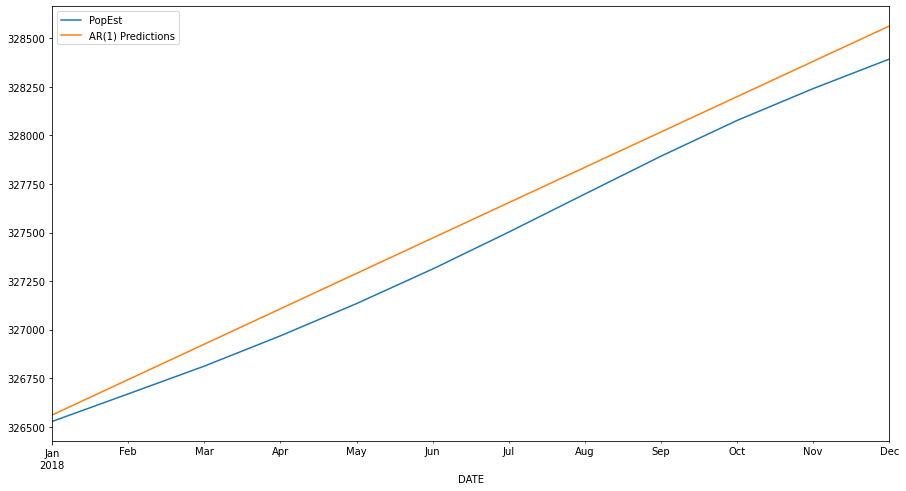

In [34]:
test.plot(figsize=(15,8), legend=True)
pred1.plot(legend=True);

## Fit an AR(2) Model

In [45]:
model2 = ar_model.AutoReg(train['PopEst'], lags=2)
AR2fit = model2.fit()

In [46]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [39]:
pred2 = AR2fit.predict(start,end)

In [40]:
pred2 = pred2.rename('AR(2) Predictions')

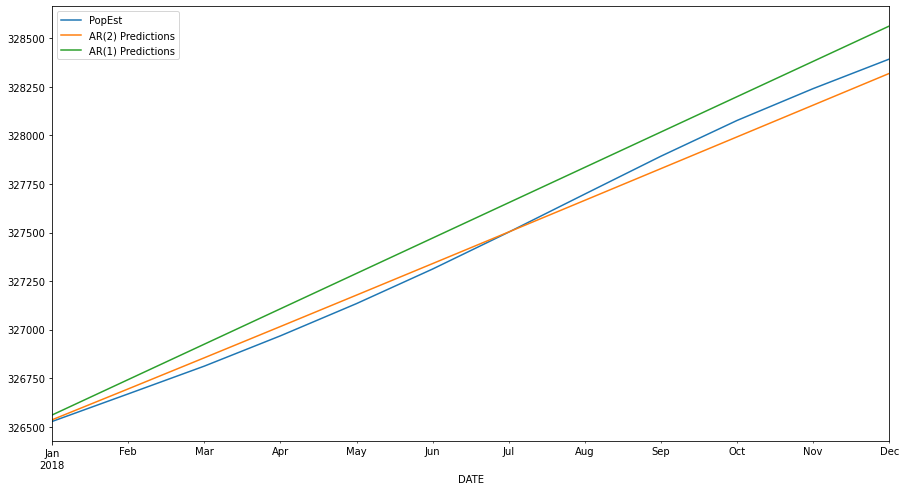

In [42]:
test.plot(figsize=(15,8), legend=True)
pred2.plot(legend=True)
pred1.plot(legend=True);

In [57]:
model8 = ar_model.AutoReg(train['PopEst'], lags=8)
AR8fit = model8.fit()

In [61]:
pred8 = AR8fit.predict(start,end)
pred8 = pred8.rename('AR(8) Predictions')

## Evaluate the Model

It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.



In [59]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [pred1, pred2, pred8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258668
AR(8) Error: 186.9783772


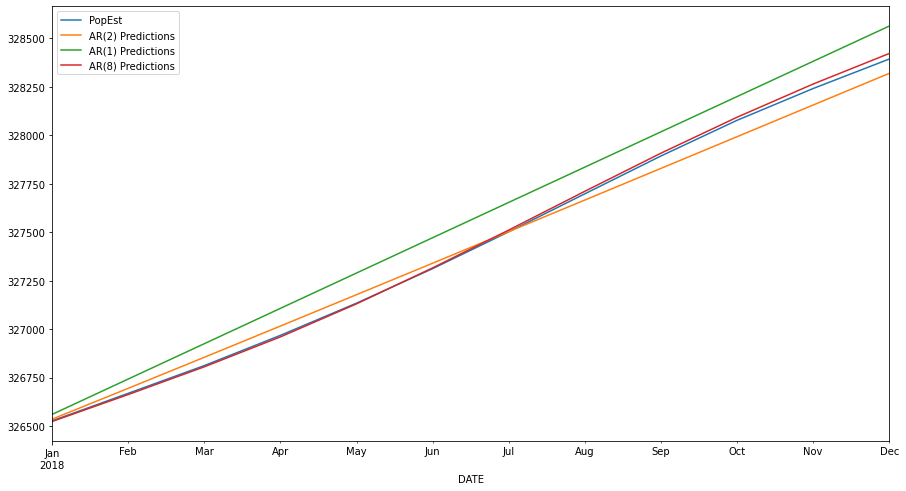

In [63]:
test.plot(figsize=(15,8), legend=True)
pred2.plot(legend=True)
pred1.plot(legend=True)
pred8.plot(legend=True);

## Forecasting
fit it to future dates.

In [67]:
model = ar_model.AutoReg(df['PopEst'], lags=8)

ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df), end=len(df)+24).rename('Forecast') # 24 months forecast

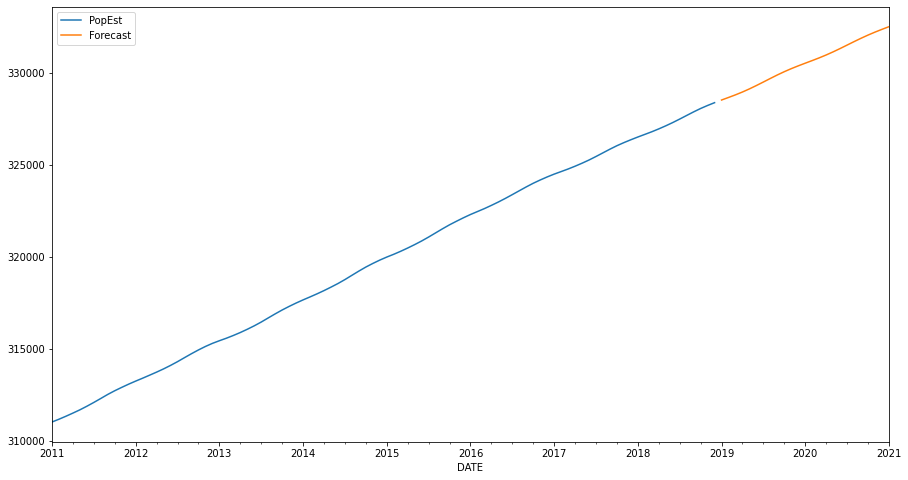

In [68]:
df['PopEst'].plot(figsize=(15,8), legend=True)
forecasted_values.plot(legend=True);